# Линейная алгебра. Лабораторная работа 1, осень 2025



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [85]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [86]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape)  # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k+1,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $a_{ij}b_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [142]:
Z = np.zeros((3, 4))
Z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [143]:
D = np.diag((1, 2, 3, 4, 5))
D

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [144]:

np.trace(D)

np.int64(15)

In [145]:
sla.inv(D)

array([[ 1.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [147]:
np.random.seed(42)
X = np.random.rand(4, 5)
X

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914]])

In [148]:
sla.det(X[1:3, 0:2])

np.float64(0.15010500037401162)

In [149]:
X.T @ X

array([[0.19867553, 0.44090588, 0.52265794, 0.40158383, 0.22604619],
       [0.44090588, 1.94051986, 1.71327514, 0.94143383, 0.4544146 ],
       [0.52265794, 1.71327514, 2.25440631, 1.36231192, 1.0317035 ],
       [0.40158383, 0.94143383, 1.36231192, 0.95139564, 0.68343847],
       [0.22604619, 0.4544146 , 1.0317035 , 0.68343847, 0.64358332]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [150]:
def my_det(X: "np.ndarray"):
    """
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    """
    det = 1.0
    X_ = [list(map(float, r)) for r in X]
    n = len(X_)
    for i in range(n):
        max_ = i
        for k in range(i + 1, n):
            if abs(X_[k][i]) > abs(X_[max_][i]):
                max_ = k
                break
        if max_ != i:
            X_[i], X_[max_] = X_[max_], X_[i]
            det *= -1
        if X_[i][i] == 0:
            return 0.0
        for j in range(i + 1, n):
            c = X_[j][i] / X_[i][i]
            for t in range(i, n):
                X_[j][t] -= c * X_[i][t]
    for i in range(n):
        det *= X_[i][i]
    return det

Простая проверка:

In [151]:
# Запустите этот блок кода
X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
print(my_det(X))
print(sla.det(X))


-1.0
-1.0


In [152]:
X = np.array([[1, 1, 1], [1, 1, 0], [1, 0, 0]])
print(my_det(X))
print(sla.det(X))

-1.0
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [155]:

# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

9.68 μs ± 441 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
62 μs ± 1.45 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
70.8 μs ± 10.6 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
22.3 ms ± 387 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.6 ms ± 9.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
44.9 s ± 13.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


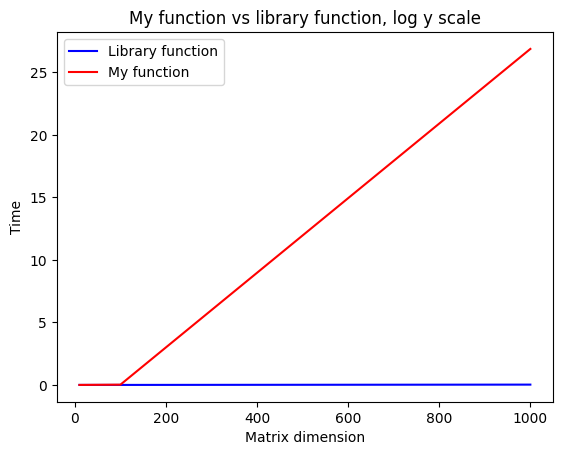

In [156]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

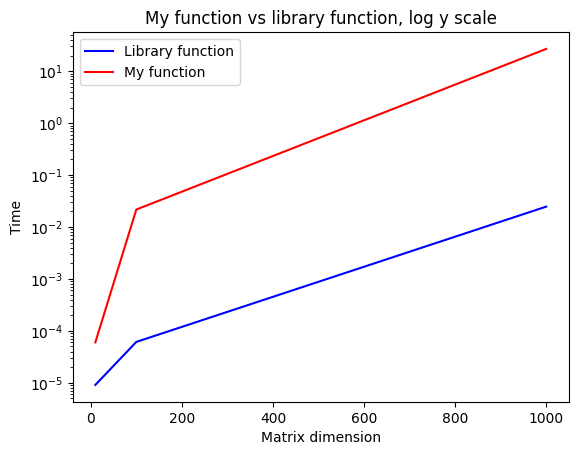

In [157]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [100]:
A = np.array([[1, 0], [10**20, 1]])
B = np.array([[10**(-20), 1], [0, 1 - 10**20]])
A @ B,

(array([[1e-20, 1],
        [1.0, 1]], dtype=object),)

In [101]:
A = np.array([[1.0, 0.0], [10.**20, 1.0]])
B = np.array([[10.0 ** (-20), 1.0], [0.0, 1.0 - 10.0**20]])
A @ B

array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])



---
**Напишите здесь свой ответ**
Первый ответ является правильным, во втором случаем нумпай запоминает выражение как результат и могут возникнуть погрешности так как тип float имеент небольную погрешность как следсвтие если нам критичны точные значения модет выдавать неверный ответ (нельзя реализовать число точь в точь, в основоном только с погрешностью)

Формально оба ответа правильные, но во втором очень сильная погрешность, что приравнивает его к неверному ответу в данном случае.

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [159]:

def my_pascal(dim):
    P = np.zeros((dim, dim))

    # Your code here
    P[::, 0] = np.ones((1, dim))
    P[0, ::] = np.ones((1, dim))

    for i in range(1, dim):
        for j in range(1, dim):
                P[i, j] = P[i, j-1] + P[i-1, j]

    return P
    

my_pascal(7), sla.det(my_pascal(30)), my_det(my_pascal(30))

(array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   2.,   3.,   4.,   5.,   6.,   7.],
        [  1.,   3.,   6.,  10.,  15.,  21.,  28.],
        [  1.,   4.,  10.,  20.,  35.,  56.,  84.],
        [  1.,   5.,  15.,  35.,  70., 126., 210.],
        [  1.,   6.,  21.,  56., 126., 252., 462.],
        [  1.,   7.,  28.,  84., 210., 462., 924.]]),
 np.float64(-3.400444993542751e+51),
 3.344477270649753e+29)

In [161]:
def my_pascal2(dim):
    '''
    нижнетреугольная матрица Паскаля
    '''
    P = np.zeros((dim, dim))

    # Your code here
    P[::, 0] = np.ones((1, dim))

    for i in range(1, dim):
        for j in range(1, dim):
            if i == j:
                P[i, j] = 1
            elif i> j:
                P[i, j] = P[i - 1, j-1] + P[i-1, j]

    return P

my_pascal2(7), sla.det(my_pascal2(30)), my_det(my_pascal2(30))

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  2.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  3.,  3.,  1.,  0.,  0.,  0.],
        [ 1.,  4.,  6.,  4.,  1.,  0.,  0.],
        [ 1.,  5., 10., 10.,  5.,  1.,  0.],
        [ 1.,  6., 15., 20., 15.,  6.,  1.]]),
 np.float64(1.0),
 0.9999999999999997)

Проверим свои решения через встроенные.

In [162]:
print(sla.det(sla.pascal(30, 'symmetric')), sla.det(my_pascal(30)))
print(sla.det(sla.pascal(30, 'upper')), sla.det((np.transpose(my_pascal2(30)))))
print(sla.det(sla.pascal(30, 'lower')), sla.det(my_pascal2(30)))

-3.400444993542751e+51 -3.400444993542751e+51
0.9999226720850162 0.9999226720850162
1.0 1.0


Чему равен её определитель? **Строго** поясните свой ответ.

----
**Ваше решение**
$$\boxed{1}$$

\
Симетричную матрицу Паскаля можно разложить на произведение 2 треугольных матриц
$S = P \dot P^T
$
где P это треугольная матрица паскаля `my_pascal2`
$det(S) = det(P) det(P^T) = det(P) ^2 = 1
$
это следует из формулы перемножения матриц и равениства
$$\sum_{k=0}\binom{i}{k} \binom{j}{k} = \binom{i+j}{i}
$$
$$ s_{i, j} = row_i(P) \times col_i(P^T) = \sum_{k} p_{i, k} p^T_{k, j} =\sum_{k=0} ^{n}\binom{i}{k} \binom{j}{k} = \binom{i+j}{i}
$$


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [163]:
sla.det(my_pascal(30))

np.float64(-3.400444993542751e+51)

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [164]:
def prod_and_sq_sum(A):
    diag_elements = np.diag(A)
    
    diagonal_product = np.prod(diag_elements)
    diagonal_sq_sum = np.sum(diag_elements ** 2)
    
    return diagonal_product, diagonal_sq_sum


In [165]:
# тест 
# цикл для теста не запрещался
X = np.random.rand(10, 10)
prod, sum_ = prod_and_sq_sum(X)
p = 1
s = 0
for i in range(X.shape[0]):
    p *= X[i, i]
    s += X[i, i] ** 2
print(prod, p)
print(sum_, s)

9.878129343399757e-09 9.878129343399757e-09
1.230817153844615 1.230817153844615


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [166]:
def f(A, B, lmbd, k):
    diag = np.diag(lmbd)
    A_ = A @ diag
    C = np.array(np.hsplit(A_, A_.shape[1]))@ np.array(np.vsplit(B.T, B.shape[1]))
    return np.sum(C[:min(A_.shape[0], k)], axis=0)


In [167]:
#check
A = np.array([[1, 2, 3], [4, 5, 6],[7, 8, 9], [10, 11, 12]])
lmbd = [1, 2, 3]
s = lmbd[0] * A[:, 0:1] @ A.T[0:1, :]
for i in range(1, A.shape[1]):
    s += lmbd[i] * A[:, i:i+1] @ A.T[i:i+1, :]
f(A, A, lmbd, 10), s

(array([[ 36,  78, 120, 162],
        [ 78, 174, 270, 366],
        [120, 270, 420, 570],
        [162, 366, 570, 774]]),
 array([[ 36,  78, 120, 162],
        [ 78, 174, 270, 366],
        [120, 270, 420, 570],
        [162, 366, 570, 774]]))

In [168]:
X1 = np.random.rand(3, 4)
X2 = np.random.rand(3, 4)
lmbd = np.random.rand(4)
f(X1, X2, lmbd, 4)

array([[0.05947875, 0.16796569, 0.11021882],
       [0.09746458, 0.2982571 , 0.20871475],
       [0.04672186, 0.17539228, 0.11190516]])

**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [169]:
def get_diag(A, B):
    # здесь не выполняется полное умножение матриц
    return np.sum(A * B.T, axis=1)

    

In [170]:
dim = 5
A = np.random.randint(0, 5, (dim, dim))
B = np.random.randint(0, 5, (dim, dim))
print(f'полученный вектор: {get_diag(A, B)}', '\n')
print('использованные матрицы:', A, '', B, sep= '\n')

полученный вектор: [27 23 27  4 10] 

использованные матрицы:
[[3 0 3 3 1]
 [2 3 2 3 3]
 [3 1 4 2 2]
 [1 0 2 1 1]
 [0 3 0 4 2]]

[[3 2 0 0 0]
 [4 2 1 2 0]
 [2 2 4 0 1]
 [4 1 4 0 2]
 [0 2 1 4 1]]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [173]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v = x - a 
    v *= coef
    v = v * (np.cos(angle) + (np.sin(angle)*1j)) # угол нужно вводить в радианах либо реализовывать np.radians(angle)
    return a + v


def shrink_rotate_conj(x, a, coef=1., angle=0.):
    v = x - a 
    v *= coef
    v = v * (np.cos(angle) + (np.sin(angle)*1j)) # угол нужно вводить в радианах либо реализовывать np.radians(angle)
    return (a + v.conjugate())


def geometric_inverse(x, a, r):
    v = x - a
    alpha = r * r / (v.conjugate() * v)
    v = alpha * v
    return a + v



In [174]:
center = 2 + 1j
R = 3
z = 5 + 4j
geometric_inverse(z, center, R), shrink_rotate(z, center), shrink_rotate_conj(z, center)

((3.5+2.5j), np.complex128(5+4j), np.complex128(5-2j))

**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

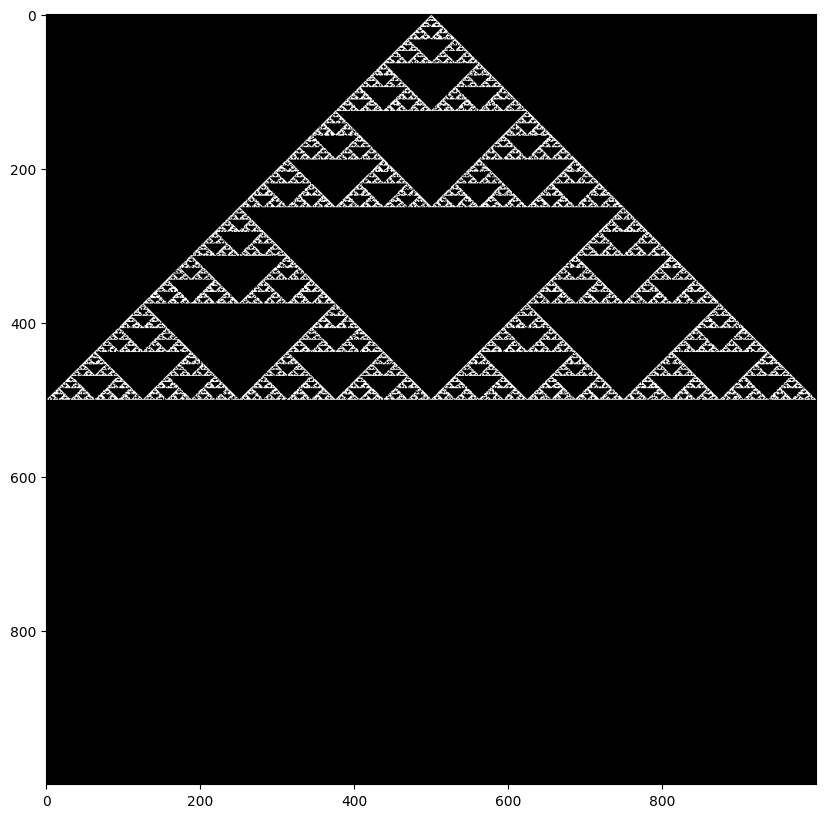

In [175]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)), # приближение к вершине с координатами (0, 1)
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)), # приближение к вершине с координатами (1, 0)
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.)) # приближение к вершине с координатами (-1, 0)
]
m = [[0] * 1000 for _ in range(1000)]
m1 = [[0] * 1000 for _ in range(1000)]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        m[-int(z.imag * 500) + 500][int(z.real  * 500) + 500] = 1

plt.figure(figsize=(10, 10))
plt.imshow(m, cmap="gray")




**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.


Мы получили треугольник Серпинского(фрактальную фигуру). 
На каждой итерации мы делаем одну из трех случайно выбранных функций(нужны для случайного распределения точек по всему фракталe, тоесть случайность нужна для однородного распределения). Каждая функция представляет собой приближение(сжатие) к одной из трех вершин треугольника. То есть мы уменьшаем расстояние между нажей точкой и вершиной(важная часть для получения фрактала).
```
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
```
Вершины задаются с помошью комплексных чисел, которые можно интепритировать как точки на плоскости(действительная ось и мнимая) или векторая или как матрицы. первая интерпритация дает большее понятие почему мы получаем фигуру на плоскости.
\
Начинаем с произвольной точки внутри треугольника

На каждом шаге случайно выбираем одну из трёх вершин

Перемещаем текущую точку в середину отрезка между ней и выбранной вершиной

Повторяем много раз

Алгоритм использует афинное преобразование — сжатие с коэффициентом 0.5 по направлению к каждой вершине. Случайный выбор обеспечивает равномерное заполнение фрактала."

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

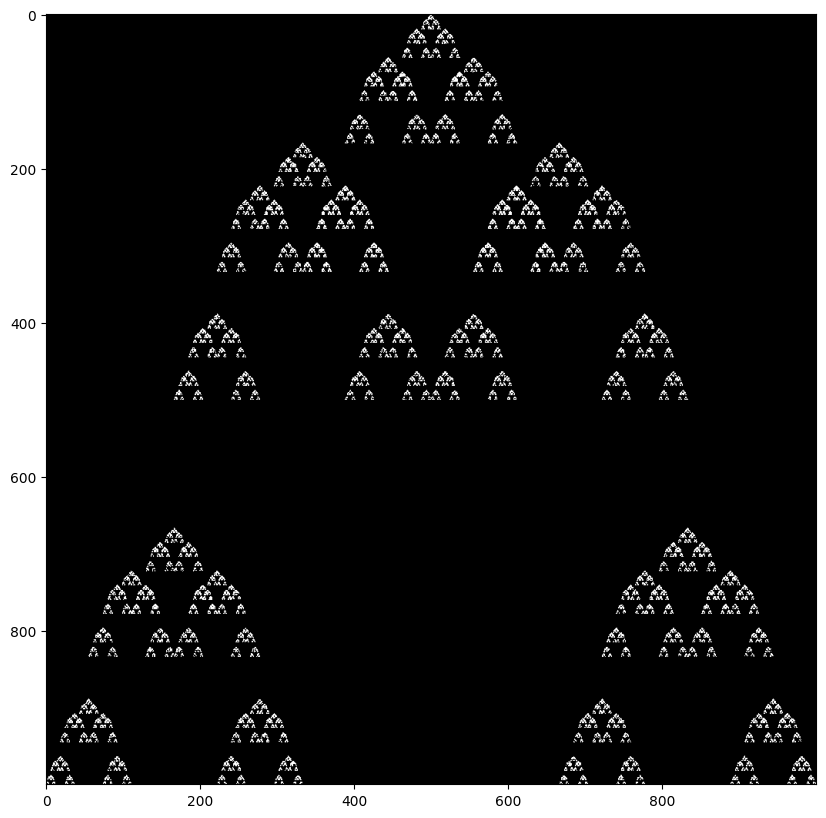

In [176]:
z = 0.5 + 0.*1j
max_iter = 100_000
func_ = [
    (lambda t: shrink_rotate(t, 0. + 0.*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 0.25 + 0.75*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 1.*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 0.75 + 0.75*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=1/3, angle=0.)),
    
]
m = [[0] * 1000 for _ in range(1000)]
# m1 = [[0] * 1000 for _ in range(1000)]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(func_))
    z = func_[n_func](z)
    if n_iter >= 10:
        m[-int(z.imag * 1000)][int(z.real  * 1000)] = 1

plt.figure(figsize=(10, 10))
plt.imshow(m, cmap="gray")



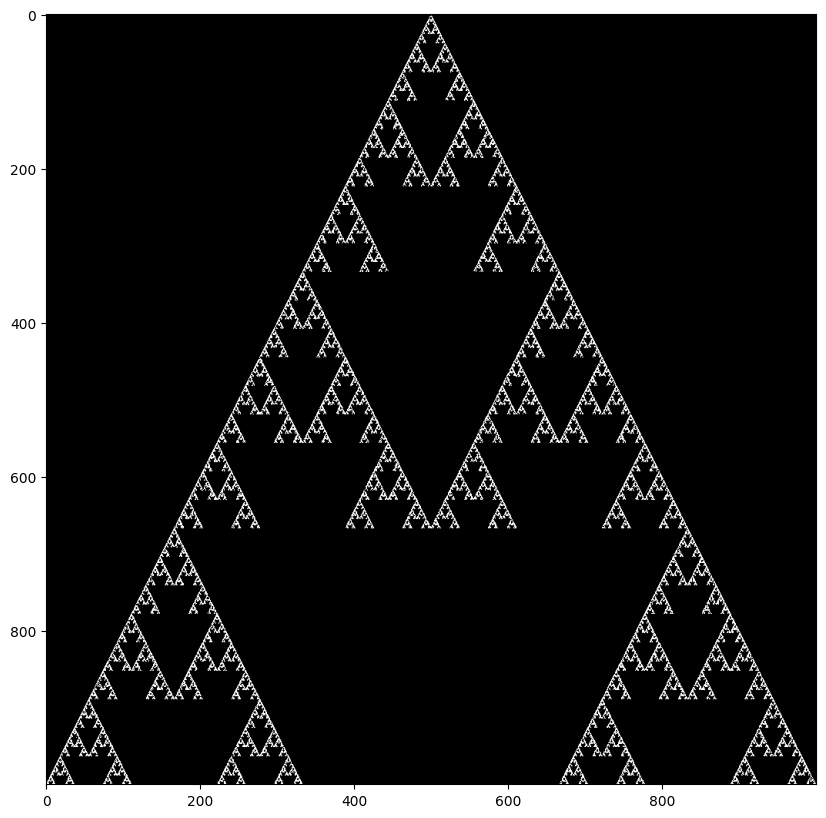

In [177]:
z = 0.5 + 0.*1j
max_iter = 100_000
func_ = [
    (lambda t: shrink_rotate(t, 0. + 0.*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 0.25 + 0.5*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 1.*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 0.75 + 0.5*1j, coef=1/3, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=1/3, angle=0.)),
    
]
m = [[0] * 1000 for _ in range(1000)]
# m1 = [[0] * 1000 for _ in range(1000)]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(func_))
    z = func_[n_func](z)
    if n_iter >= 10:
        m[-int(z.imag * 1000)][int(z.real  * 1000)] = 1

plt.figure(figsize=(10, 10))
plt.imshow(m, cmap="gray")






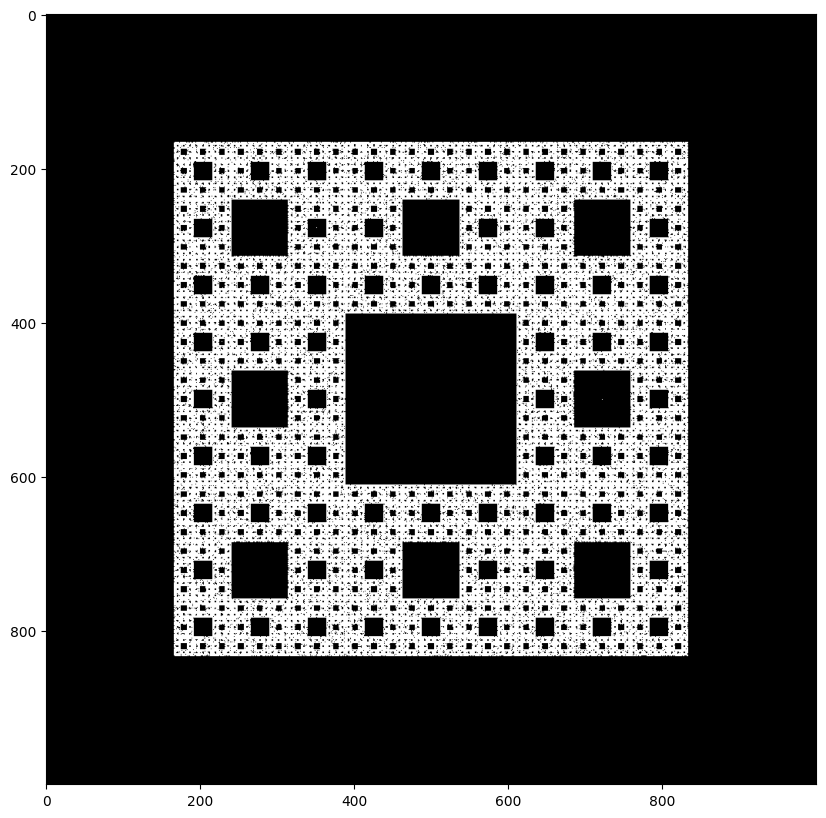

In [119]:
z = 0 + 0.*1j
max_iter = 1000000


points = [
    -2/3 + 2/3*1j,
    0 + 2/3*1j, 
    2/3 + 2/3*1j,
    -2/3 +0*1j, 
    2/3 + 0*1j,
    -2/3 - 2/3*1j,
      0 - 2/3*1j, 
      2/3 - 2/3*1j
]

size = 1000
m = [[0] * 1000 for _ in range(1000)]

funcs = [(lambda t, A=A: shrink_rotate(t, A, coef=1/3, angle=0)) for A in points]



for i in range(max_iter):
    c = np.random.choice(len(funcs))
    z = funcs[c](z)
    m[int((z.real + 1) / 2 * 1000)][int((1- z.imag) / 2  * 1000)] = 1

plt.figure(figsize=(10, 10))
plt.imshow(m, cmap="gray")



**Следующий код работает очень долго** 
Реализуем похожий алгоритм только вместо трех верший возьмем 5
Получим что-то похожее на треугольник Серпинского, тоглько для пятиугольника


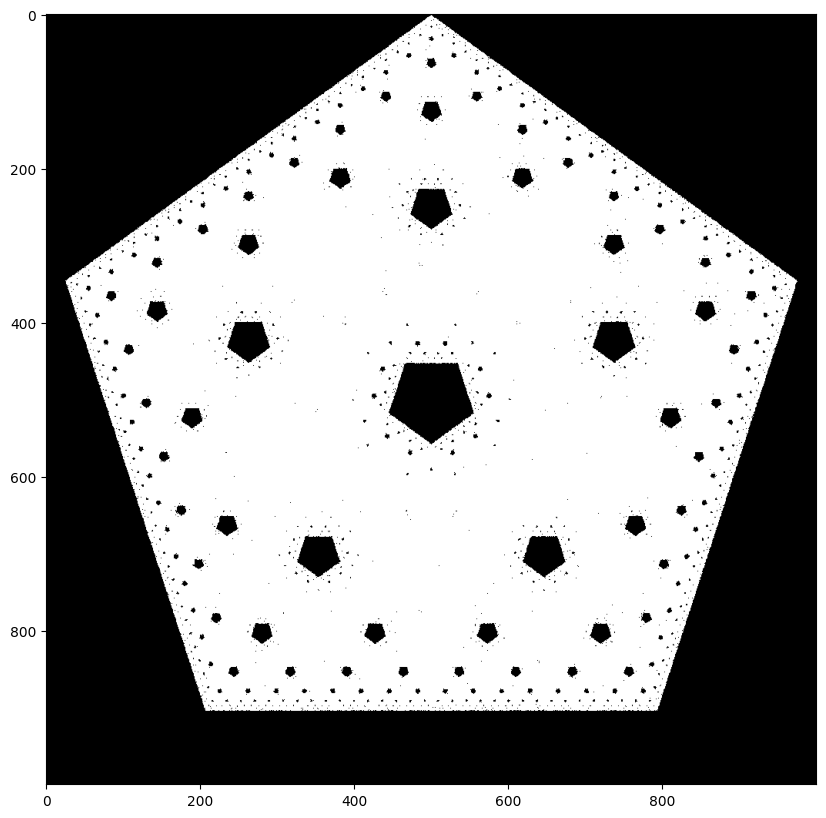

In [179]:

z = 0.5 + 0.*1j
max_iter = 10_000_000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t,0.9511 +  0.309j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5878 -0.8090j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -0.5878 -0.8090j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -0.9511 + 0.3090j, coef=0.5, angle=0.)),
]
m = [[0] * 1000 for _ in range(1000)]
m1 = [[0] * 1000 for _ in range(1000)]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        m[-int(z.imag * 500) + 500][int(z.real  * 500) + 500] = 1

plt.figure(figsize=(10, 10))
plt.imshow(m, cmap="gray")

# Следующий блок кода просто для красоты
Просто стало интересно какие еще есть фрактальные фигуры

Создание фракталов


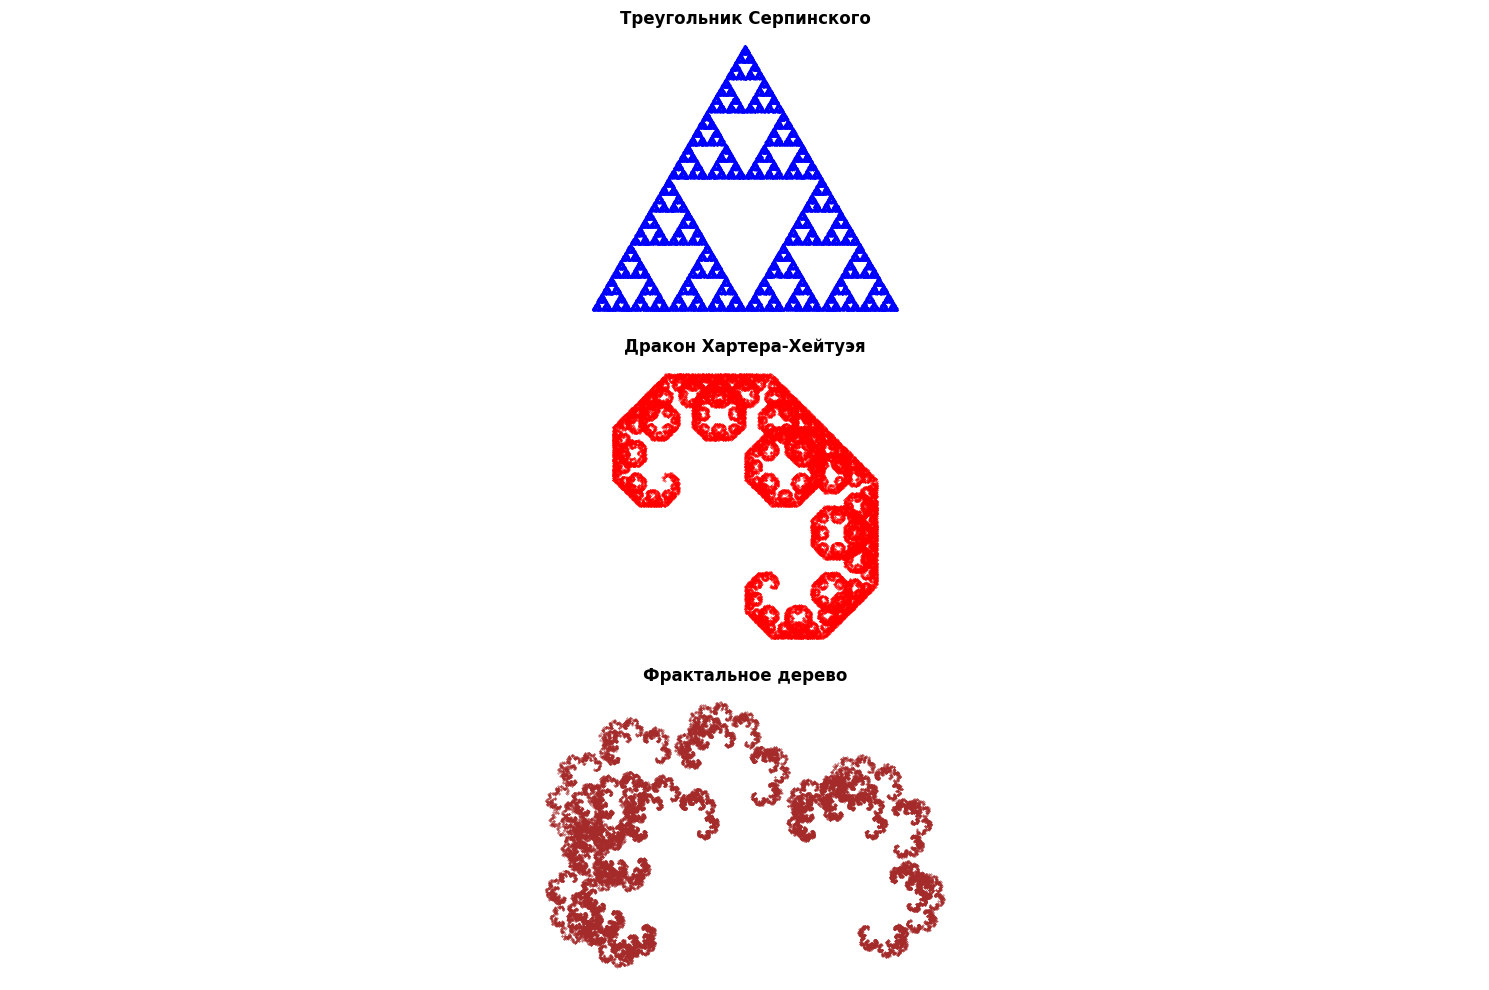

In [137]:
# ТРЕУГОЛЬНИК СЕРПИНСКОГО
# То что мы реализовывали в самом начале
def sierpinski_triangle_shrink(iterations=50000):
    """Треугольник Серпинского через shrink_rotate"""
    # Вершины треугольника
    vertices = [complex(0, 0), complex(1, 0), complex(0.5, np.sqrt(3) / 2)]

    # Преобразования для каждой вершины (масштаб 1/2)
    transformations = [
        lambda z: shrink_rotate(z, vertices[0], coef=0.5, angle=0),
        lambda z: shrink_rotate(z, vertices[1], coef=0.5, angle=0),
        lambda z: shrink_rotate(z, vertices[2], coef=0.5, angle=0),
    ]

    point = complex(0.1, 0.1)
    points = []

    for i in range(iterations):
        transform = np.random.choice(transformations)
        point = transform(point)
        if i > 100:
            points.append(point)

    return points


# ДРАКОН ХАРТЕРА-ХЕЙТУЭЯ
def dragon_curve_shrink(iterations=50000):
    """Дракон через shrink_rotate"""
    center = complex(0.5, 0.5)

    transformations = [
        # Поворот на 45 градусов
        lambda z: shrink_rotate(z, center, coef=1 / np.sqrt(2), angle=np.pi / 4),
        # Поворот на -45 градусов со сдвигом
        lambda z: shrink_rotate(z, center, coef=1 / np.sqrt(2), angle=-np.pi / 4)
        + complex(0.5, 0),
    ]

    point = complex(0.5, 0.5)
    points = []

    for i in range(iterations):
        transform = np.random.choice(transformations)
        point = transform(point)
        if i > 100:
            points.append(point)

    return points


# ФРАКТАЛЬНОЕ ДЕРЕВО
def fractal_tree_shrink(iterations=50000):
    """Фрактальное дерево"""
    base = complex(0.5, 0)

    transformations = [
        # Основной ствол
        lambda z: shrink_rotate(z, base, coef=0.6, angle=np.pi / 6) + complex(0, 0.1),
        # Левая ветвь
        lambda z: shrink_rotate(z, base, coef=0.5, angle=np.pi / 3) + complex(0, 0.1),
        # Правая ветвь
        lambda z: shrink_rotate(z, base, coef=0.5, angle=-np.pi / 3) + complex(0, 0.1),
    ]

    point = complex(0.5, 0)
    points = []

    for i in range(iterations):
        transform = np.random.choice(transformations)
        point = transform(point)
        if i > 100:
            points.append(point)

    return points


# ВИЗУАЛИЗАЦИЯ ВСЕХ ФРАКТАЛОВ
def plot_all_fractals():
    """Визуализация всех фракталов"""

    fractals = [
        (sierpinski_triangle_shrink(), "Треугольник Серпинского", "blue"),
        (dragon_curve_shrink(), "Дракон Хартера-Хейтуэя", "red"),
        (fractal_tree_shrink(), "Фрактальное дерево", "brown"),
    ]

    fig, axes = plt.subplots(3, figsize=(15, 10))
    for idx, (points, title, color) in enumerate(fractals):
        col = idx

        x = [p.real for p in points]
        y = [p.imag for p in points]

        axes[col].scatter(x, y, s=0.1, c=color)
        axes[col].set_title(title, fontsize=12, fontweight="bold")
        axes[col].axis("equal")
        axes[col].axis("off")

    plt.tight_layout()
    plt.show()


print("Создание фракталов")
plot_all_fractals()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

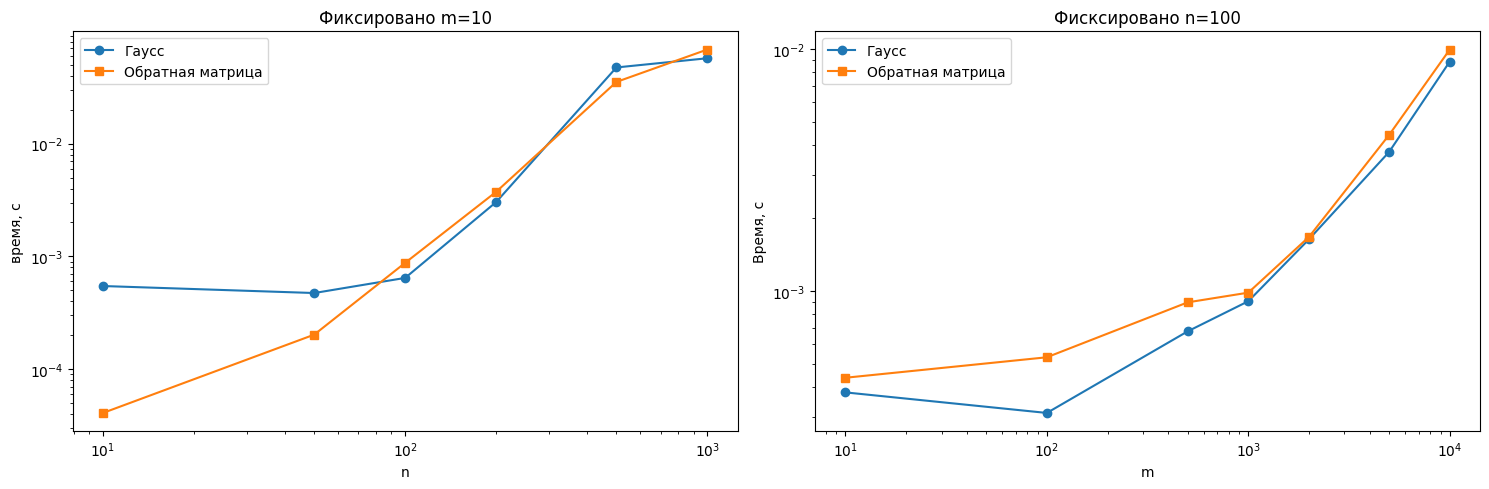

In [180]:
import time

def time_solve(n, m):
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    t_gauss = []
    # метод Гаусса
    for i in range(5):
        t0 = time.perf_counter()
        X1 = sla.solve(A, B)
        t_gauss.append(time.perf_counter() - t0)

    # через обратную матрицу
    t_inv = []
    for i in range(5):
        t0 = time.perf_counter()
        X2 = sla.inv(A) @ B
        t_inv.append(time.perf_counter() - t0)

    return np.median(t_gauss), np.median(t_inv)


# Изменяем n при фиксированном m=10
ns = [10, 50, 100, 200, 500, 1000]
m = 10
times_gauss_n, times_inv_n = [], []
for n in ns:
    tg, ti = time_solve(n, m)
    times_gauss_n.append(tg)
    times_inv_n.append(ti)

#  Изменяем m при фиксированном n=100
n = 100
ms = [10, 100, 500, 1000, 2000, 5000, 10000]
times_gauss_m, times_inv_m = [], []
for m in ms:
    tg, ti = time_solve(n, m)
    times_gauss_m.append(tg)
    times_inv_m.append(ti)

#  рисовашки
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(ns, times_gauss_n, 'o-', label='Гаусс')
axs[0].plot(ns, times_inv_n, 's-', label='Обратная матрица')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('n')
axs[0].set_ylabel('время, с')
axs[0].set_title('Фиксировано m=10')
axs[0].legend()

axs[1].plot(ms, times_gauss_m, "o-", label="Гаусс")
axs[1].plot(ms, times_inv_m, 's-', label="Обратная матрица")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel("m")
axs[1].set_ylabel("Время, с")
axs[1].set_title("Фисксировано n=100")
axs[1].legend()

plt.tight_layout()
plt.show()

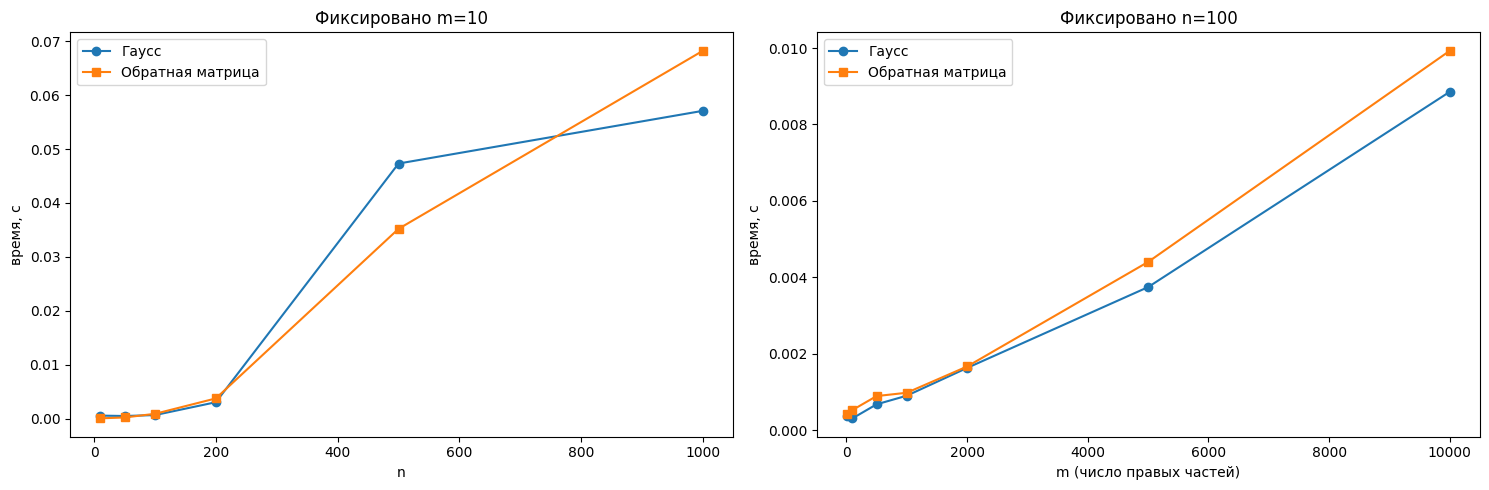

In [181]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(ns, times_gauss_n, 'o-', label='Гаусс')
axs[0].plot(ns, times_inv_n, 's-', label='Обратная матрица')
axs[0].set_xlabel('n')
axs[0].set_ylabel('время, с')
axs[0].set_title('Фиксировано m=10')
axs[0].legend()

axs[1].plot(ms, times_gauss_m, 'o-', label='Гаусс')
axs[1].plot(ms, times_inv_m, 's-', label='Обратная матрица')
# axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[1].set_xlabel('m (число правых частей)')
axs[1].set_ylabel('время, с')
axs[1].set_title('Фиксировано n=100')
axs[1].legend()

plt.tight_layout()
plt.show()


При подсчете обратной матрицы испоользуется порядка 
$\frac{8n^3}{3} + 2mn^2$

\
$\frac{2n(n+1)(2n+1)}{6} + 2n^3$
\
Нам нужна только степень равная или больше третьей. получаем 
$\frac{2n^3}{3}$
\
Пояснение для обнуления первого столбца использыется примерно $n^2$ действий, для каждой строки производится n умножений на скаляр и n вычетаний получаем $n^2$ для следующей строчи получаем $(n-1)^2$\
$
    \sum^{n}_{k=1}2k^2 = \frac{2n(n+1)(2n+1)}{6}
$
также учтем, что наша матрица расширенная и мы будем тратить на
$n^3$
действий большею

Для получения улучшенного ступенчатого вида из ступенчатого трится поорядка 
$n^3 $
действий, то есть сумма
$
    \sum^{n}_{k=1}4nk = \frac{4n^2(n-1)}{2} = 2n^3
$
для перемножения матриц размера n на n и m на n тратися проядка 
$2mn^2$ 
действий на каждый элемент матрицы выполняется n умножений и n сложений, всего элементов mn





Для получения решения по методу Гаусса тратится порядка 
$\frac{2n^3}{3} + 2mn^2$
действий(по аналогичным соображениям)
Пояснение для обнуления первого столбца использыется $O(n^2 + mn)$ действий, для каждой строки производится n умножений на скаляр и n вычетаний получаем $n^2$ для следующей строчи получаем $(n-1)^2$\
$
    \sum^{n}_{k=1}2(k^2 + mn) = \frac{2n(n+1)(2n+1)}{6} + 2mn^2
$

Из проведенных расчетов получаем, что метод Гаусса работает быстрее чем решение обратной матрицей.
\
Из графиков видно что при малых значениях n и больших значениях m, оба решения работают почли одинаково, но обратная матрица работает немного быстрее(вероятней из-за оптимизиции функций так как не все опрерации выполняются за одинаковое время).
При больших n из графиков и формулы видно что метод Гаусса более эфективный. 

$$\boxed{\text{Гаусс работает эффективней при больших n}
}
\boxed{
\text{Обратная матрица  работает эффективней при больших m}
}$$

P.S.
\
numpy реализует более эфективные алгоритмы, поэтосу данные могут немного не соответсвтовать правде.
В основном Гаусс быстрее.

